# Data Pre-Processing
### dealing with missing data
when dealing with missing data, you are either taught to do one of the following:

(1) erase corresponding rows with missing cells

(2) impute (or fill) sample average of each column into missing cells

* second option has stronger assumptions than the first, so for bigger datasets especially, the first option is harmless


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from scipy.stats.mstats import zscore
import patsy

# download dataset to use throughout
hprice3 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/hprice3.dta')

# view first six observations
hprice3.head()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
0,1978.0,48.0,2304.0,4.0,3000.0,1000.0,6.9078,60000.0,7.0,1660.0,4578.0,1.0,10700.0,9.277999,11.00210,0.0,7.414573,8.429017,47.717701
1,1978.0,83.0,6889.0,4.0,4000.0,1000.0,6.9078,40000.0,6.0,2612.0,8370.0,2.0,11000.0,9.305651,10.59663,0.0,7.867871,9.032409,47.717701
2,1978.0,58.0,3364.0,4.0,4000.0,1000.0,6.9078,34000.0,6.0,1144.0,5000.0,1.0,11500.0,9.350102,10.43412,0.0,7.042286,8.517193,47.717701
3,1978.0,11.0,121.0,4.0,4000.0,1000.0,6.9078,63900.0,5.0,1136.0,10000.0,1.0,11900.0,9.384294,11.06507,0.0,7.035269,9.210340,47.717701
4,1978.0,48.0,2304.0,4.0,4000.0,2000.0,7.6009,44000.0,5.0,1868.0,10000.0,1.0,12100.0,9.400961,10.69195,0.0,7.532624,9.210340,57.773682


* y81(whether year 1981), rooms(number of rooms in house), and nbh(neighborhood 1-6) are categorical variables
* y81 - standard categorical variable, rooms - ordered, nbh - unordered
* rooms and nbh have multiple categories

(array([  4.,  30.,   0.,  96.,   0., 169.,  10.,   0.,  11.,   1.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ],
       dtype=float32),
 <a list of 10 Patch objects>)

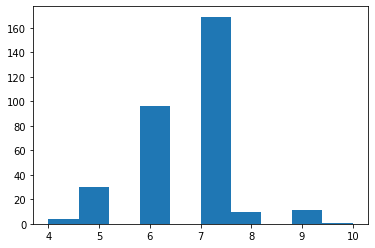

In [43]:
# view types of the variables before categorical
hprice3[['y81', 'nbh', 'rooms']].dtypes

# plot histograph of variable room before treated as categorical
plt.hist(hprice3.rooms)

In [84]:
# change y81, nbh, rooms to categorical
hprice3['y81'] = hprice3['y81'].astype('category')
hprice3['nbh'] = hprice3['nbh'].astype(CategoricalDtype(ordered=False))
hprice3['rooms'] = hprice3['rooms'].astype(CategoricalDtype(ordered=True))

# view data types after conversion
hprice3[['y81', 'nbh', 'rooms']].dtypes

y81      category
nbh      category
rooms    category
dtype: object

In [119]:
# plot histograph of variable room after treated as categorical
# plt.hist(hprice3.rooms) - not seeing a change?

* in regressions, you want to transform ordered and unordered categorical variables with multiple categories into (c-1) dummy variables (c = total number of categories)

In [85]:
# use C() to denote categorical variable and np.power(,2) to square variable in specification
log_cbd = np.log(hprice3.cbd) 
f = 'lprice ~ lland + larea + np.power(log_cbd,2) + C(y81) + C(rooms) + C(nbh) + linst + linstsq + ldist + baths + age + agesq'

# create a design matrix using patsy package
y, X = patsy.dmatrices(f, data=hprice3, return_type='dataframe')

# run OLS and regression 
model = OLS(y,X)
reg = model.fit()

# see summary and the t coefficients
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     55.03
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.65e-91
Time:                        15:08:59   Log-Likelihood:                 70.215
No. Observations:                 321   AIC:                            -94.43
Df Residuals:                     298   BIC:                            -7.686
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4370      2.179      1.578      0.116      -0.850       7.724
C(y81)[T.1.0]            0.3790      0.024     15.827      0.000       0.332       0.426
C(rooms)[T.5.0]          0.1328      0.110      1.209      0.228      -0.083       0.349
C(rooms)[T.6.0]          0.0617      0.107      0.580      0.563      -0.148       0.271
C(rooms)[T.7.0]          0.1408      0.111      1.270      0.205      -0.077       0.359
C(rooms)[T.8.0]          0.1741      0.126      1.387      0.167      -0.073       0.421
C(rooms)[T.9.0]          0.2907      0.131      2.216      0.027       0.033       0.549
C(rooms)[T.10.0]         0.3937      0.247      1.593      0.112      -0.093       0.880
C(nbh)[T.1.0]           -0.0309      0.053     -0.588      0.557      -0.134       0.072
C(nbh)[T.2.0]           -0.0568      0.041     -1.400      0.162      -0.137       0.023
C(nbh)[T.3.0]           -0.1985      0.085     -2.322      0.021      -0.367      -0.030
C(nbh)[T.4.0]           -0.0132      0.056     -0.237      0.813      -0.123       0.097
C(nbh)[T.5.0]           -0.0717      0.059     -1.225      0.222      -0.187       0.043
C(nbh)[T.6.0]           -0.0484      0.050     -0.976      0.330      -0.146       0.049
lland                    0.1222      0.027      4.531      0.000       0.069       0.175
larea                    0.3535      0.053      6.663      0.000       0.249       0.458
np.power(log_cbd, 2)    -0.0019      0.004     -0.436      0.663      -0.010       0.007
linst                    0.6030      0.437      1.380      0.169      -0.257       1.463
linstsq                 -0.0372      0.026     -1.418      0.157      -0.089       0.014
ldist                    0.1429      0.068      2.090      0.037       0.008       0.277
baths                    0.0989      0.028      3.548      0.000       0.044       0.154
age                     -0.0068      0.001     -4.580      0.000      -0.010      -0.004
agesq                 2.737e-05   9.25e-06      2.957      0.003    9.15e-06    4.56e-05
==============================================================================
Omnibus:                       83.764   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.554
Skew:                          -0.900   Prob(JB):                    1.68e-115
Kurtosis:                       9.023   Cond. No.                     9.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# see the design matrix from patsy
X

,Intercept,C(y81)[T.1.0],C(rooms)[T.5.0],C(rooms)[T.6.0],C(rooms)[T.7.0],C(rooms)[T.8.0],C(rooms)[T.9.0],C(rooms)[T.10.0],C(nbh)[T.1.0],C(nbh)[T.2.0],...,C(nbh)[T.6.0],lland,larea,"np.power(log_cbd, 2)",linst,linstsq,ldist,baths,age,agesq
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.429017,7.414573,64.101921,6.9078,47.717701,9.277999,1.0,48.0,2304.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.032409,7.867871,68.791252,6.9078,47.717701,9.305651,2.0,83.0,6889.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.517193,7.042286,68.791252,6.9078,47.717701,9.350102,1.0,58.0,3364.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.210340,7.035269,68.791252,6.9078,47.717701,9.384294,1.0,11.0,121.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.210340,7.532624,68.791252,7.6009,57.773682,9.400961,1.0,48.0,2304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.922658,7.235619,84.830376,9.2103,84.829643,9.735069,1.0,25.0,625.0
317,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,10.795220,8.051978,101.723541,10.1660,103.347603,10.126630,3.0,0.0,0.0
318,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.711460,7.167038,92.463715,9.6158,92.463608,9.966462,2.0,20.0,400.0
319,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.696070,7.045776,91.141640,9.6158,92.463608,9.928180,2.0,19.0,361.0


* best to define categorical variables outside of regression in order to fix specification more
* skipped exercise in handout

## Including Interaction Terms
* take square of the original predictors and use to account for increasing/decreasing returns to scale in modeling 

* can also think of them as products of themselves, which is a specific type of interaction term

* to interact different terms, use ":"

In [86]:
# new version of previous specification
g = 'lprice ~ lland + larea + linst + age + linst:age + np.power(linst,2) + np.power(age,2)'

# create a design matrix using patsy package
y2, X2 = patsy.dmatrices(g, data=hprice3, return_type='dataframe')

# run OLS and regression 
model = OLS(y2,X2)
reg = model.fit()

# get coefficients
coef1 = reg.params
print(coef1)

Intercept             2.254721
lland                 0.102120
larea                 0.638386
linst                 0.852793
age                  -0.017408
linst:age             0.000740
np.power(linst, 2)   -0.052262
np.power(age, 2)      0.000044
dtype: float64


In [87]:
# print summary statistics for specific variables
hprice3[['age', 'inst', 'linst']].describe()

,age,inst,linst
count,321.000000,321.000000,321.000000
mean,18.009346,16442.367188,9.480508
std,32.565872,9033.133789,0.777166
min,0.000000,1000.000000,6.907800
25%,0.000000,9000.000000,9.105000
50%,4.000000,16000.000000,9.680300
75%,22.000000,24000.000000,10.086000
max,189.000000,34000.000000,10.434000


In [88]:
# get the mean for inst then take the log
u_linst = np.log(np.mean(hprice3.inst)) 

# get the mean for age 
u_age = np.mean(hprice3.age)

# take their difference
linst = hprice3.linst-u_linst
age = hprice3.age-u_age

# estimate following specification that takes into account the mean
h = 'lprice ~ lland + larea + linst + age + linst:age + np.power(linst,2) + np.power(age,2)'

# create a design matrix using patsy package
y3, X3 = patsy.dmatrices(h, data=hprice3, return_type='dataframe')

# run OLS and regression 
model = OLS(y3,X3)
reg = model.fit()

# get coefficients
coef2 = reg.params

# create table comparing coef
dict = {'coef1':coef1, 'coef2':coef2}
pd.DataFrame(dict)

,coef1,coef2
Intercept,2.254721,2.254721
lland,0.102120,0.102120
larea,0.638386,0.638386
linst,0.852793,0.852793
age,-0.017408,-0.017408
linst:age,0.000740,0.000740
"np.power(linst, 2)",-0.052262,-0.052262
"np.power(age, 2)",0.000044,0.000044


interpretation example
* in coef2 specification, B_3 (linst) represents the average price elasticity with respect to the distance from the highway for a home that's 18 years old (u_mean = 18.01) and located 16,442ft from the highway (u_inst = 16,442)

## beta coefficients
* goal: see why standardization is useful

original OLS equation:

$y_i = \hat{\beta_0} + \hat{\beta_1} x_{i1} + \hat{\beta_2} x_{i2} + \dots + \hat{\beta_k} x_{ik} + \hat{e_i}$

average previous equation: 

$y_i - \hat{y} = \hat{\beta_1} (x_{i1} - \bar{x_1}) + \hat{\beta_2} (x_{i2} - \bar{x_2}) + \dots + \hat{\beta_k} (x_{ik} - \bar{x_k}) + \hat{e_i}$

* average of $e_i$ has sample mean zero

dividing by sample standard deviation:

* $\hat{\sigma_y}$ := sample standard deviation for dependent variable

* $\hat{\sigma_i}$ := sample standard deviation for independent variables $i \in \{1,...,i\}$

$\frac{y_i - \hat{y}}{\hat{\sigma_y}}$ = $(\frac{\hat{\sigma_1}}{\hat{\sigma_y}}) \hat{\beta_1} \frac{(x_{i1} - \bar{x_1})}{\hat{\sigma_1}}$ + $(\frac{\hat{\sigma_2}}{\hat{\sigma_y}}) \hat{\beta_2} \frac{(x_{i2} - \bar{x_2})}{\hat{\sigma_2}}$ + $\dots$ + $(\frac{\hat{\sigma_k}}{\hat{\sigma_y}}) \hat{\beta_k} \frac{(x_{ik} - \bar{x_k})}{\sigma_k})$ + $\frac{\hat{e_i}}{\sigma_y}$

define new variables to simplify the equation

* $z_{iy}$ = $\frac{y_i - \hat{y}}{\hat{\sigma_y}}$

* $z_{ai}$ = $\frac{(x_{ia} - \bar{x_a})}{\hat{\sigma_a}}$ for $a=1,...,k$

* denoting e = $\frac{\hat{e_i}}{\sigma_y}$

$z_y = \hat{b_1} z_1 + \hat{b_2} z_2 + \dots + \hat{b_k} z_k + e$

where new coefficient is

$\hat{b_j} = (\frac{\hat{\sigma_j}}{\hat{\sigma_y}}) \hat{\beta_j}$

$\hat{b_j}$ := standardized coefficients or beta coefficients 

* if $x_a$ increases by one standard deviation, then $\hat{y}$ changes by $\hat{b_a}$ standard deviations

* measuring effects not in terms of original units of y or $x_a$ but in standard deviation units


In [118]:
# get the beta coefficients for previous specification - still seeing how
#model = OLS(zscore(y3),zscore(X3)[:,-1])
#reg = model.fit()
#reg.params


* since each x has been standardized, comparing the magnitudes of the resulting beta coefficients is now useful